## Classification


In [149]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_classification, make_regression
from collections import defaultdict

In [150]:
class KNNClassification():
  def __init__(self,K=5):
    self.K = K
    self.X = None
    self.y = None
    self.df = pd.DataFrame()

  def fit(self,X,y):
    self.X = X
    self.y = y
    self.df[["f1","f2"]] = X
    self.df["label"] = y

  def predict(self,xq,yq):
    dist = defaultdict()

    for index, row in self.df.iterrows():
      dist[(row["f1"],row["f2"])] = (abs(xq-row["f1"])+abs(yq-row["f2"]),int(row["label"]))

    k_nei = [x[1] for x in sorted(dist.items(),key=lambda x:x[1][0])[:5]]

    classes = {c:0 for c in df.label.unique()}

    for nei in k_nei:
      classes[nei[1]]+=1

    mx, pred_class = float("-inf"), None

    for k,v in classes.items():
      if v > mx:
        mx = v
        pred_class = k

    return pred_class

In [151]:
data = make_classification(n_samples=1000, n_features=2, n_informative=2,
                           n_redundant=0, n_classes=2 ,shuffle=True)

In [152]:
d ={"f1":[x[0] for x in data[0]],
    "f2":[x[1] for x in data[0]],
    "label":[l for l in data[1]]
    }

df = pd.DataFrame(d)

In [153]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   f1      1000 non-null   float64
 1   f2      1000 non-null   float64
 2   label   1000 non-null   int64  
dtypes: float64(2), int64(1)
memory usage: 23.6 KB


<Axes: xlabel='f1', ylabel='f2'>

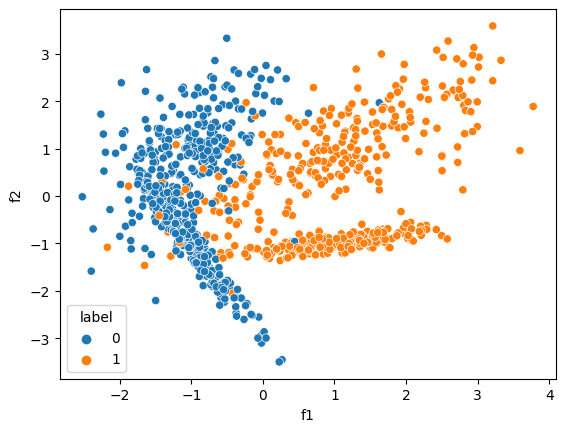

In [154]:
sns.scatterplot(df, x="f1", y="f2", hue="label")

In [155]:
# set K and query point
K, xq, yq = 5, np.random.rand(1), np.random.rand(1)
K, xq, yq

(5, array([0.39480831]), array([0.28255641]))

In [156]:
X = df[['f1','f2']]
y = df[['label']]

In [157]:
model = KNNClassification(K)
model.fit(X,y)

In [158]:
pred_class = model.predict(xq,yq)
print(f"The query point belongs to class {pred_class}")

The query point belongs to class 1


## Regression

In [159]:
class KNNRegression():
  def __init__(self,K=5):
    self.K = K
    self.X = None
    self.y = None
    self.df = pd.DataFrame()

  def fit(self,X,y):
    self.X = X
    self.y = y
    self.df[["f1","f2"]] = X
    self.df["label"] = y

  def predict(self,xq,yq):
    dist = defaultdict()

    for index, row in self.df.iterrows():
      dist[(row["f1"],row["f2"])] = (abs(xq-row["f1"])+abs(yq-row["f2"]),int(row["label"]))

    k_nei = [x[1] for x in sorted(dist.items(),key=lambda x:x[1][0])[:5]]

    pred_val = sum(x[1] for x in k_nei) / len(k_nei)

    return pred_val

In [160]:
data = make_regression(n_samples=100, n_features=2, n_informative=2,
                       n_targets=1, noise=0.2, shuffle=True)

In [161]:
d ={"f1":[x[0] for x in data[0]],
    "f2":[x[1] for x in data[0]],
    "label":[l for l in data[1]]
    }

len(d["f1"]), len(d["f2"]), len(d["label"])

(100, 100, 100)

In [162]:
df = pd.DataFrame(d)
df

,f1,f2,label
0,1.032989,-0.863151,22.013864
1,-0.223888,1.338578,90.168678
2,-1.073639,-1.510259,-220.921769
3,1.841109,-0.602648,116.421715
4,1.791418,0.365516,191.863181
...,...,...,...
95,-1.040059,0.598446,-44.516193
96,0.719617,-0.221014,46.605814
97,-1.901974,0.159239,-158.382205
98,-0.801961,0.450873,-35.051814


In [163]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   f1      100 non-null    float64
 1   f2      100 non-null    float64
 2   label   100 non-null    float64
dtypes: float64(3)
memory usage: 2.5 KB


<Axes: xlabel='f1', ylabel='f2'>

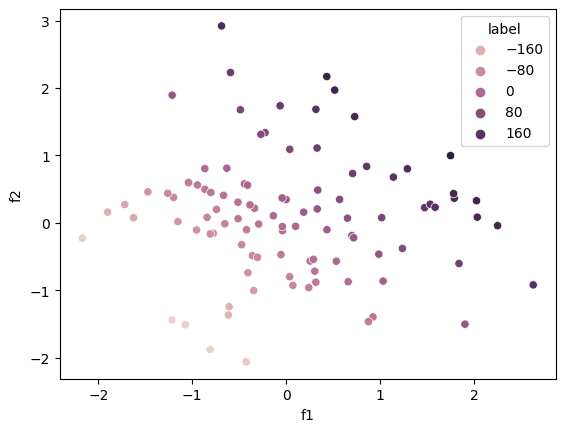

In [164]:
sns.scatterplot(df, x="f1", y="f2", hue="label")

In [165]:
X = df[['f1','f2']]
y = df[['label']]

In [166]:
# set K and query point
K, xq, yq = 5, np.random.rand(1), np.random.rand(1)
K, xq, yq

(5, array([0.05914271]), array([0.4276975]))

In [167]:
model = KNNRegression(K)
model.fit(X,y)

In [168]:
pred_val = model.predict(xq,yq)
print(f"The predicted value is {pred_val}")

The predicted value is 40.0
